[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leo-gg/bhs/blob/main/Data_structures/NB3_Hands_on_complete.ipynb)



# Notebook 3 - A hands-on example with [AnnData](https://anndata.readthedocs.io/en/latest/) and [Scanpy](https://scanpy.readthedocs.io/en/stable/)

In this notebook we will use data from an everyday example to populate an AnnData object and analyze it with Scanpy

<br/><br/>

We will use [IPMA](https://www.ipma.pt/pt/index.html) weather data from different cities in Portugal, see what are the main differences between them and how they group together
<br/><br/>
The data is parsed from Wikipedia, and you have it stored in three convenient csv files:
- **Pt_cities.csv**: region, population and area of each city
- **Pt_temp.csv**: temperature data
- **Pt_rain.csv**: rainfall data

<img src="https://www.ipma.pt/opencms/system/modules/ipma.website/resources/images/logo-ipma-17.svg" alt="AnnData" style="width:600px; height:auto;"/>


# Setup the environment

The *basic* libraries (Numpy, Pandas, Matplotlib, Seaborn...) are already installed in Google Colab. To run this notebook you will need to install scanpy and anndata

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install scanpy

In [ ]:
# Import all the libraries we will use
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [ ]:
# Some details for the plots
plt.rcParams.update({'font.size':18, 'figure.figsize':(8,8)})

In [ ]:
if not os.path.exists('Pt_cities.csv'):
    !wget https://raw.githubusercontent.com/Leo-GG/bhs/main/Data_structures/Weather/Pt_cities.csv
if not os.path.exists('Pt_temp.csv'):
    !wget https://raw.githubusercontent.com/Leo-GG/bhs/main/Data_structures/Weather/Pt_temp.csv
if not os.path.exists('Pt_rain.csv'):
    !wget https://raw.githubusercontent.com/Leo-GG/bhs/main/Data_structures/Weather/Pt_rain.csv

--2024-02-10 19:35:18--  https://raw.githubusercontent.com/Leo-GG/bhs/main/Data_structures/Weather/Pt_cities.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1140 (1.1K) [text/plain]
Saving to: ‘Pt_cities.csv’

Pt_cities.csv       100%[===================>]   1.11K  --.-KB/s    in 0s      

2024-02-10 19:35:19 (67.0 MB/s) - ‘Pt_cities.csv’ saved [1140/1140]



# Load the data
Create a DataFrame from each of the files

In [ ]:
# Cities "metadata"
df_cities=pd.read_csv('Pt_cities.csv', index_col=0)  # Specify that we want the first column to be used as index
# Temperature values
df_temp=pd.read_csv('Pt_temp.csv', index_col=0)
# Rainfall data
#df_rain= WRITE_YOUR_CODE_HEREDE_HERE
df_rain=pd.read_csv('Pt_rain.csv', index_col=0)

In [ ]:
df_cities.head(3)

,City_name,Sub-region,Region,Population_2021,Area_km2,Density
City,,,,,,
Lisbon,Lisbon,Lisbon Metropolitan Area,Lisbon Metropolitan Area,545796,100.05,5456.5
Porto,Porto,Porto Metropolitan Area,North,231800,41.42,5165.6
Braga,Braga,Cávado,North,146543,61.38,2351.9


In [ ]:
df_temp.head(3)

,Mean_max_Jan,Daily_mean_Jan,Mean_min_Jan,Mean_max_Feb,Daily_mean_Feb,Mean_min_Feb,Mean_max_Mar,Daily_mean_Mar,Mean_min_Mar,Mean_max_Apr,...,Daily_mean_Oct,Mean_min_Oct,Mean_max_Nov,Daily_mean_Nov,Mean_min_Nov,Mean_max_Dec,Daily_mean_Dec,Mean_min_Dec,Mean_max_Year,Daily_mean_Year
City,,,,,,,,,,,,,,,,,,,,,
Lisbon,14.8,11.6,8.3,16.2,12.7,9.1,18.8,14.9,11.0,19.8,...,18.8,15.1,18.2,15.0,11.8,15.3,12.4,9.4,21.3,17.4
Porto,13.8,9.5,5.2,15.0,10.4,5.9,17.4,12.6,7.8,18.1,...,16.4,12.2,17.1,13.0,8.9,14.4,10.7,6.9,19.6,15.2
Braga,13.7,9.0,4.3,14.8,9.9,4.9,17.6,12.3,7.0,18.3,...,15.9,10.8,16.8,12.3,7.7,14.4,10.2,6.0,20.3,15.0


In [ ]:
df_rain.head(3)

,Average_mm_Jan,Average_mm_Feb,Average_mm_Mar,Average_mm_Apr,Average_mm_May,Average_mm_Jun,Average_mm_Jul,Average_mm_Aug,Average_mm_Sep,Average_mm_Oct,Average_mm_Nov,Average_mm_Dec
City,,,,,,,,,,,,
Lisbon,99.9,84.9,53.2,68.1,53.6,15.9,4.2,6.2,32.9,100.8,127.6,126.7
Porto,147.1,110.5,95.6,117.6,89.6,39.9,20.4,32.9,71.9,158.3,172.0,181.0
Braga,176.4,114.8,121.6,130.8,112.9,48.6,22.0,34.0,81.7,191.7,193.9,220.2


#Basic questions using DataFrames

In [ ]:
# Which city is the 3rd largest by population?

# You can use the sort_values() function to quickly view the df_cities DataFrame ordered however you want
df_cities.sort_values('Population_2021')
#my_adata.obs.sort_values(WRITE_YOUR_CODE_HERE)

,City_name,Sub-region,Region,Population_2021,Area_km2,Density
City,,,,,,
Machico,Machico,Madeira,Madeira,9990,17.41,564.5
Mirandela,Mirandela,Lands of Trás-os-Montes,North,10911,29.78,382.9
Sines,Sines,Alentejo Coast,Alentejo,12338,5.40,2285.0
Tavira,Tavira,Algarve,Algarve,13762,147.99,104.2
Elvas,Elvas,High Alentejo,Alentejo,14324,202.70,71.2
Abrantes,Abrantes,Medium Tejo,Center,17199,64.47,250.3
Lagos,Lagos,Algarve,Algarve,19790,29.15,811.4
Covilhã,Covilha,Beiras and Serra da Estrela,Center,31950,25.95,702.1
Évora,Evora,Central Alentejo,Alentejo,40373,112.06,183.5


In [ ]:
# Which city is the 4th smallest area?
df_cities.sort_values('Area_km2')
#WRITE_YOUR_CODE_HERE

,City_name,Sub-region,Region,Population_2021,Area_km2,Density
City,,,,,,
Sines,Sines,Alentejo Coast,Alentejo,12338,5.40,2285.0
Machico,Machico,Madeira,Madeira,9990,17.41,564.5
Covilhã,Covilha,Beiras and Serra da Estrela,Center,31950,25.95,702.1
Lagos,Lagos,Algarve,Algarve,19790,29.15,811.4
Mirandela,Mirandela,Lands of Trás-os-Montes,North,10911,29.78,382.9
Porto,Porto,Porto Metropolitan Area,North,231800,41.42,5165.6
Setúbal,Setubal,Lisbon Metropolitan Area,Lisbon Metropolitan Area,98470,51.49,1755.6
Braga,Braga,Cávado,North,146543,61.38,2351.9
Abrantes,Abrantes,Medium Tejo,Center,17199,64.47,250.3


In [ ]:
# How much was the total average rain on average in January?
df_rain.columns

Index(['Average_mm_Jan', 'Average_mm_Feb', 'Average_mm_Mar', 'Average_mm_Apr',
       'Average_mm_May', 'Average_mm_Jun', 'Average_mm_Jul', 'Average_mm_Aug',
       'Average_mm_Sep', 'Average_mm_Oct', 'Average_mm_Nov', 'Average_mm_Dec'],
      dtype='object')

In [ ]:
df_rain['Average_mm_Jan'].sum()
#df_rain[WRITE_YOUR_CODE_HERE].WRITE_YOUR_CODE_HERE()

1818.3999999999999

# Mixing the data
The temperatures are two different "modalities", so they are in different scales. If we want to analyze them toghether, we should at least scale the values to have everything in the same range.
<br/><br/>


<img src="https://github.com/Leo-GG/bhs/blob/main/notebook_illustrations/apploranges.jpg?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

<br/><br/>
*or we could use multi-omics...

In [ ]:
# Import a scaler from sklearn. This scaler will "fit" and "transform" our data to the interval (0,1), where 0 is the minimum value and 1 is the maximum
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#First the temperature
scaled_temp = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
# Then the rain
scaled_rain = pd.DataFrame(scaler.fit_transform(df_rain), columns=df_rain.columns, index=df_rain.index)


In [ ]:
scaled_rain.head(3)

,Average_mm_Jan,Average_mm_Feb,Average_mm_Mar,Average_mm_Apr,Average_mm_May,Average_mm_Jun,Average_mm_Jul,Average_mm_Aug,Average_mm_Sep,Average_mm_Oct,Average_mm_Nov,Average_mm_Dec
0,0.283290,0.346435,0.251641,0.301782,0.361679,0.250000,0.190909,0.152439,0.277037,0.292842,0.451040,0.328529
1,0.591384,0.580439,0.715536,0.853007,0.749193,0.800459,0.927273,0.966463,0.854815,0.708604,0.722766,0.654655
2,0.782637,0.619744,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950108,0.856793,0.890090


In [ ]:
# Now put everything toghether

# This is done with the merge function from pandas. It will join dataframes using the index or any could that we specify
df_w=scaled_temp.merge(scaled_rain, left_index=True, right_index=True)

# Merging DataFrames is extremly useful!!

In [ ]:
df_w.shape

(18, 50)

#Make an AnnData object

Now we have
- df_w: A DataFrame with numerical values
- df_cities: A DataFrame with "metadata" about the cities

Can you put them toghether into an AnnData object?

In [ ]:
my_adata=sc.AnnData(X=df_w, obs=df_cities)

#my_adata=sc.AnnData(X= WRITE_YOUR_CODE_HERE , obs= WRITE_YOUR_CODE_HERE)

In [ ]:
my_adata

AnnData object with n_obs × n_vars = 18 × 50
    obs: 'City_name', 'Sub-region', 'Region', 'Population_2021', 'Area_km2', 'Density'

In [ ]:
my_adata.var_names

Index(['Mean_max_Jan', 'Daily_mean_Jan', 'Mean_min_Jan', 'Mean_max_Feb',
       'Daily_mean_Feb', 'Mean_min_Feb', 'Mean_max_Mar', 'Daily_mean_Mar',
       'Mean_min_Mar', 'Mean_max_Apr', 'Daily_mean_Apr', 'Mean_min_Apr',
       'Mean_max_May', 'Daily_mean_May', 'Mean_min_May', 'Mean_max_Jun',
       'Daily_mean_Jun', 'Mean_min_Jun', 'Mean_max_Jul', 'Daily_mean_Jul',
       'Mean_min_Jul', 'Mean_max_Aug', 'Daily_mean_Aug', 'Mean_min_Aug',
       'Mean_max_Sep', 'Daily_mean_Sep', 'Mean_min_Sep', 'Mean_max_Oct',
       'Daily_mean_Oct', 'Mean_min_Oct', 'Mean_max_Nov', 'Daily_mean_Nov',
       'Mean_min_Nov', 'Mean_max_Dec', 'Daily_mean_Dec', 'Mean_min_Dec',
       'Mean_max_Year', 'Daily_mean_Year', 'Average_mm_Jan', 'Average_mm_Feb',
       'Average_mm_Mar', 'Average_mm_Apr', 'Average_mm_May', 'Average_mm_Jun',
       'Average_mm_Jul', 'Average_mm_Aug', 'Average_mm_Sep', 'Average_mm_Oct',
       'Average_mm_Nov', 'Average_mm_Dec'],
      dtype='object')

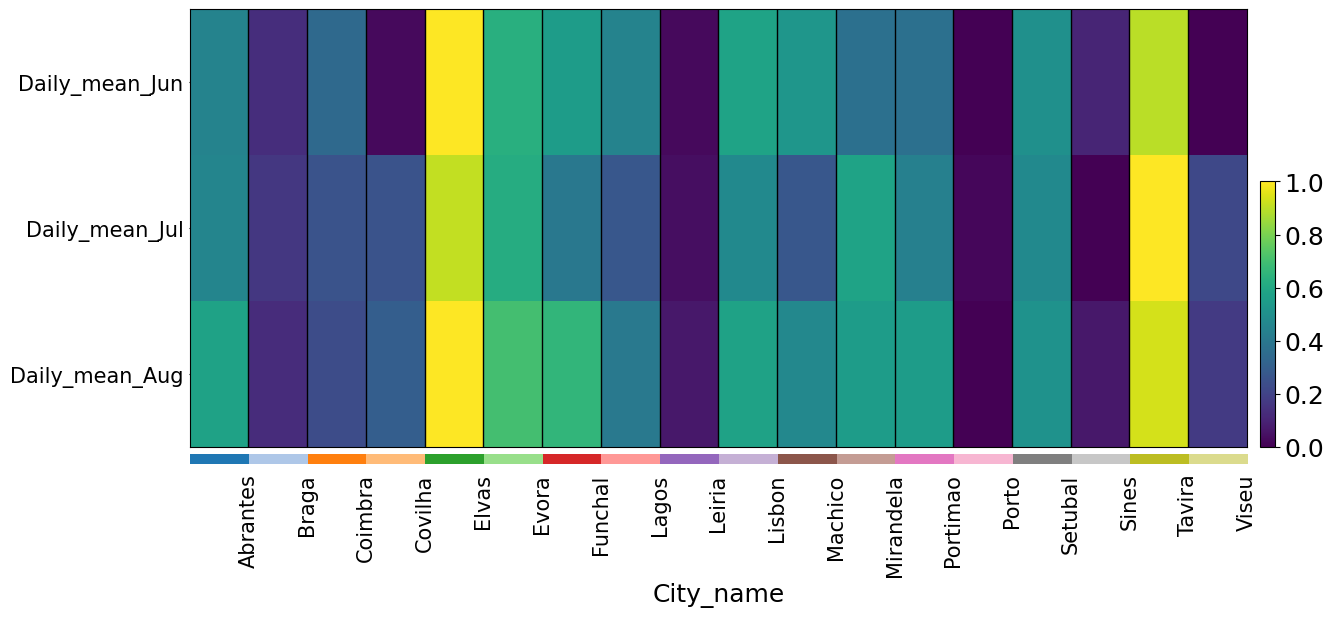

In [ ]:
# Let's see the hottest places in Summer (Jun, Jul, Aug)

sc.pl.heatmap(my_adata, var_names=['Daily_mean_Jun','Daily_mean_Jul','Daily_mean_Aug'], groupby='City_name', swap_axes=True,figsize=[14,6])

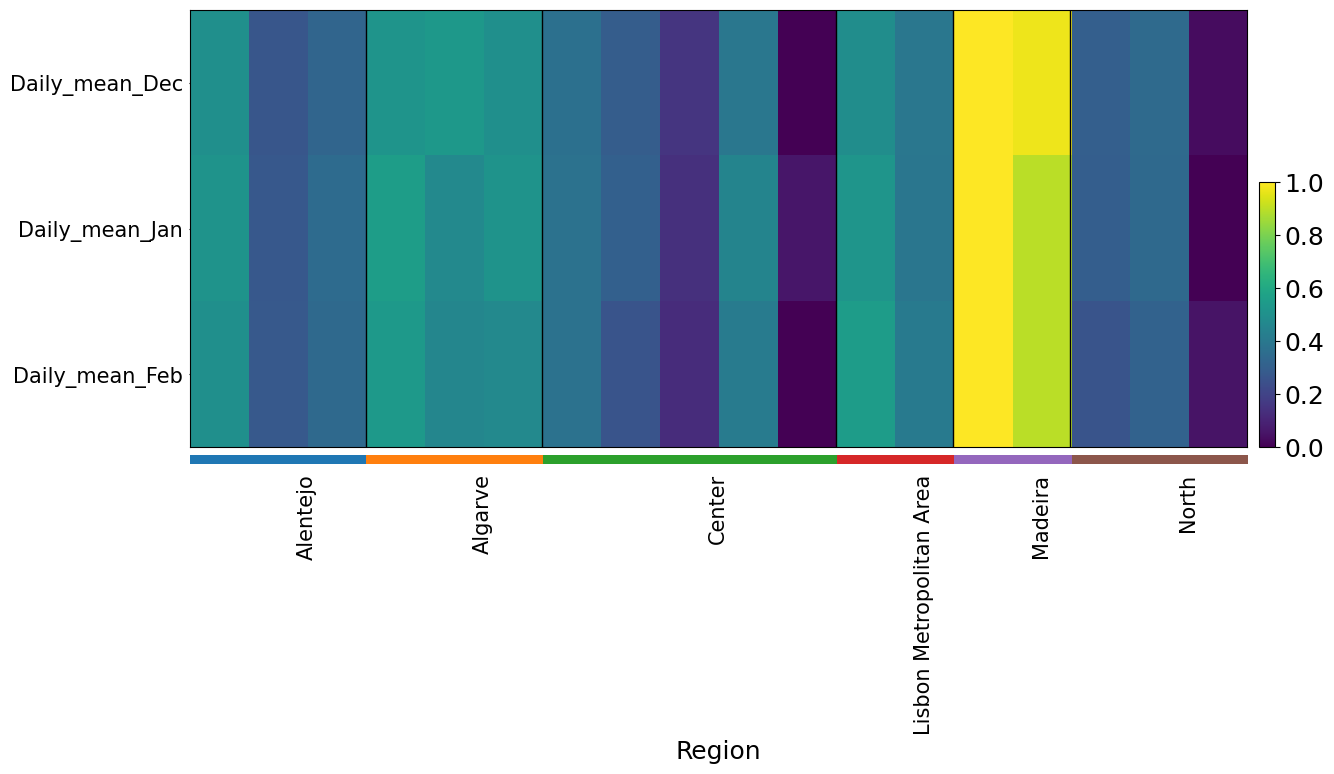

In [ ]:
# Now can you see the coldest REGION in the winter months (Dec, Jan, Feb)?

#sc.pl.heatmap( WRITE_YOUR_CODE_HERE, var_names= WRITE_YOUR_CODE_HERE, groupby=WRITE_YOUR_CODE_HERE, swap_axes=True,figsize=[14,6]
sc.pl.heatmap(my_adata, var_names=['Daily_mean_Dec','Daily_mean_Jan','Daily_mean_Feb'], groupby='Region', swap_axes=True,figsize=[14,6])

# How is the weather?
Now run a statistical test to see the largest differences between the regions.

In [ ]:
# Run a comparison using a Wilcoxon test
sc.tl.rank_genes_groups(my_adata, groupby='Region', method='wilcoxon')
#sc.tl.rank_genes_groups(WRITE_YOUR_CODE_HERE, groupby=WRITE_YOUR_CODE_HERE, method='wilcoxon')

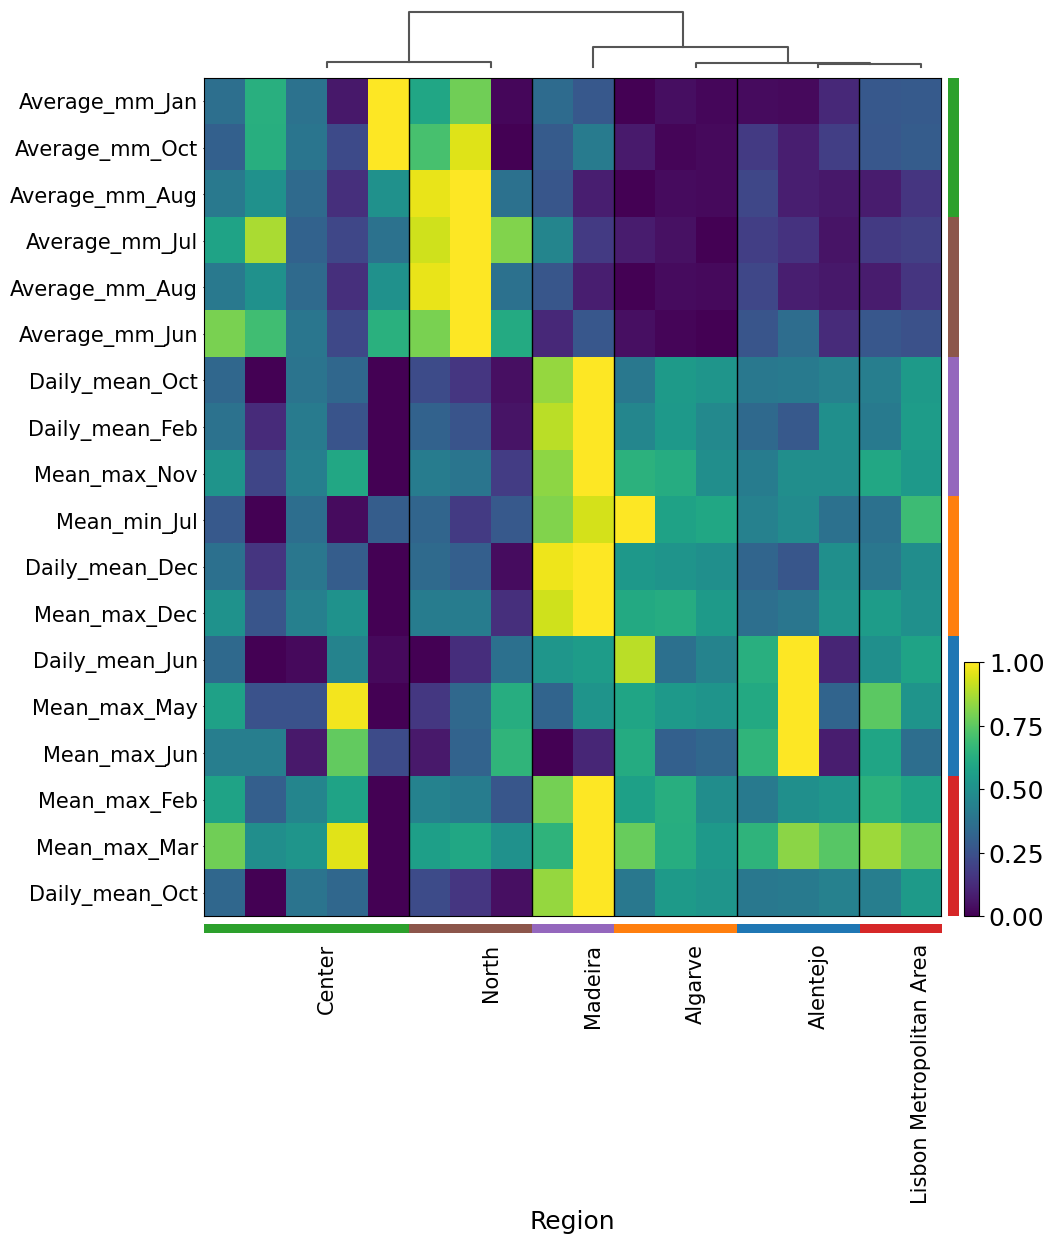

In [ ]:
# Now let's see the results; plot the first three features that more more distinctive of each region
# Note that the comparison was done between each region and ALL the others!
sc.pl.rank_genes_groups_heatmap(my_adata, n_genes=3,groupby='Region',swap_axes=True,figsize=[10,12])
#sc.pl.rank_genes_groups_heatmap(WRITE_YOUR_CODE_HERE, n_genes=WRITE_YOUR_CODE_HERE,groupby='Region',swap_axes=True,figsize=[10,12])

# Plotting data in 2d
Now use Scanpy to run PCA on the data

In [ ]:
# Apply PCA, use just 10 components
sc.pp.pca(my_adata, n_comps=10)


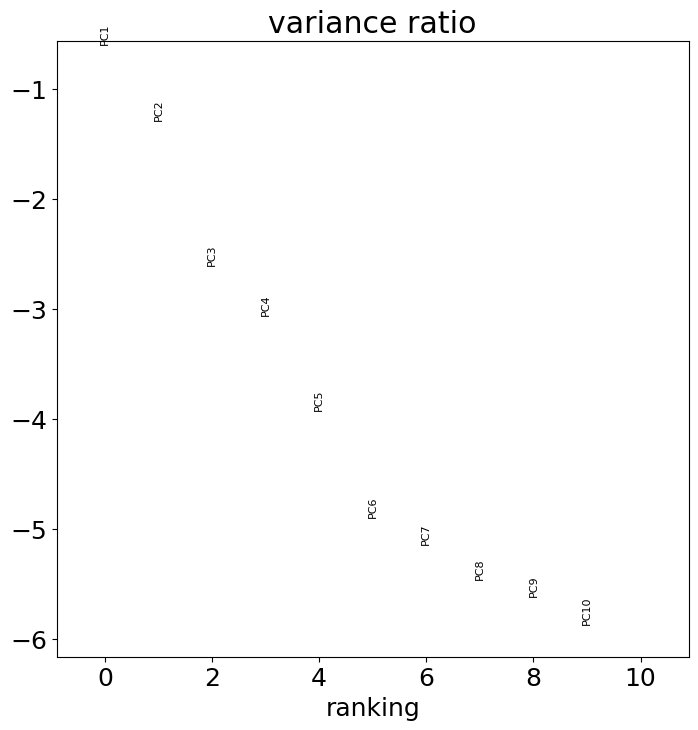

In [ ]:
# Visualize the PCA loadings
sc.pl.pca_variance_ratio(my_adata, log=True, n_pcs=10)

In [ ]:
my_adata.obs.City_name=my_adata.obs.City_name.astype('category')

Plot the data projected on the first two PCs (the default option). Color by region, city name and some of the distinctive features

In [ ]:
my_adata.obs.dtypes

City_name          category
Sub-region         category
Region             category
Population_2021       int64
Area_km2            float64
Density             float64
dtype: object

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


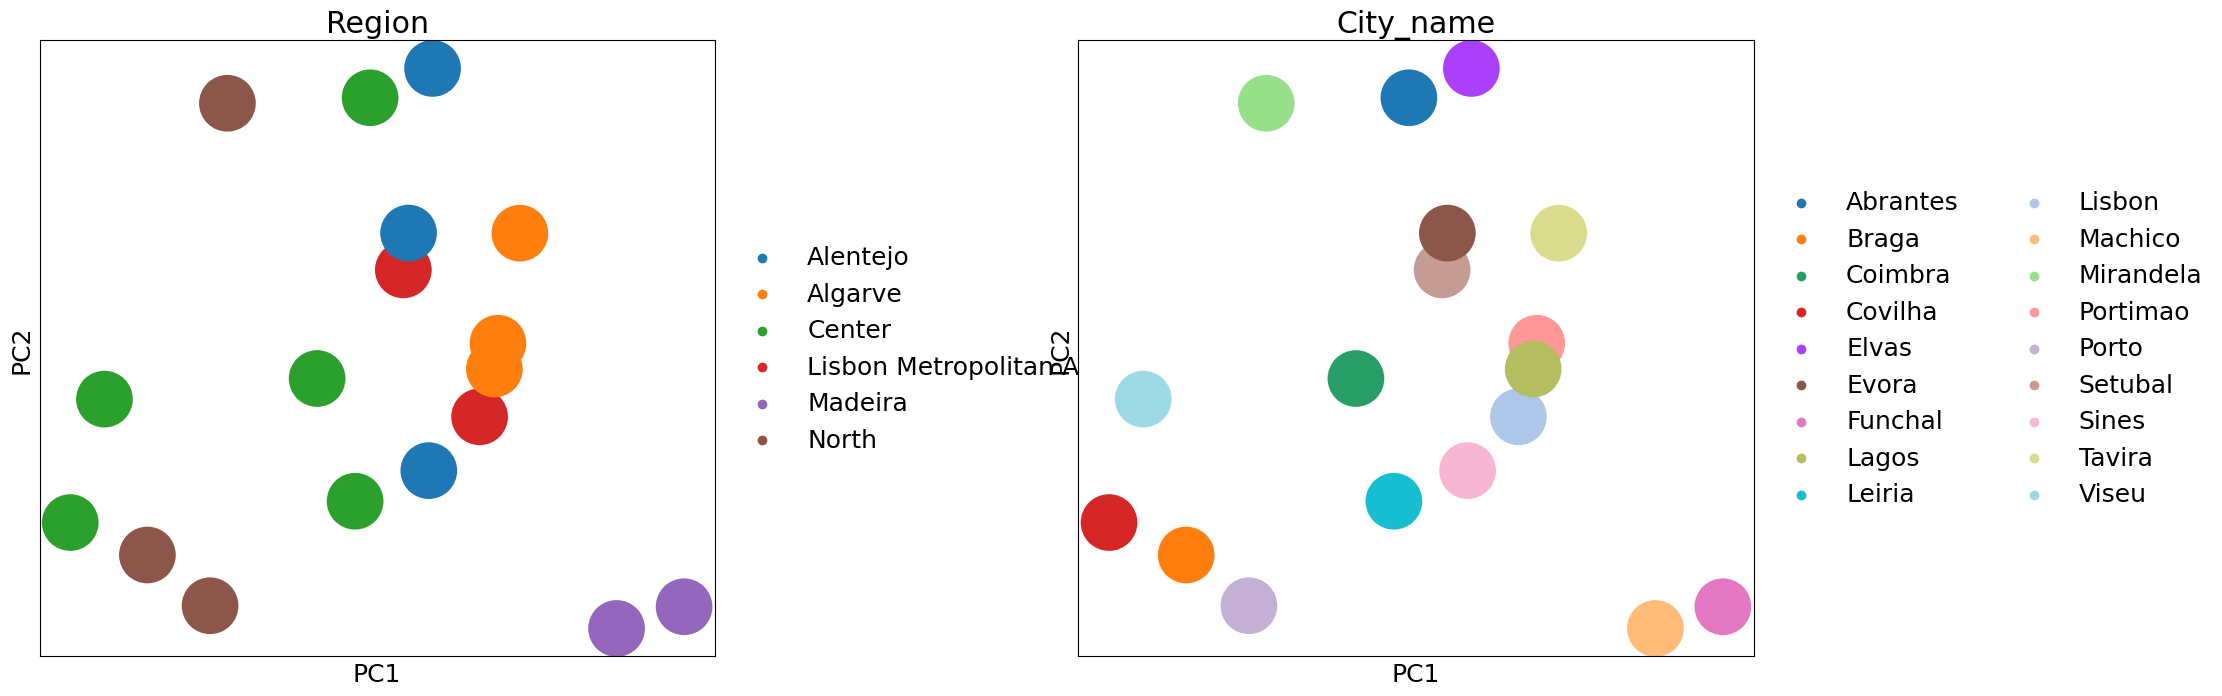

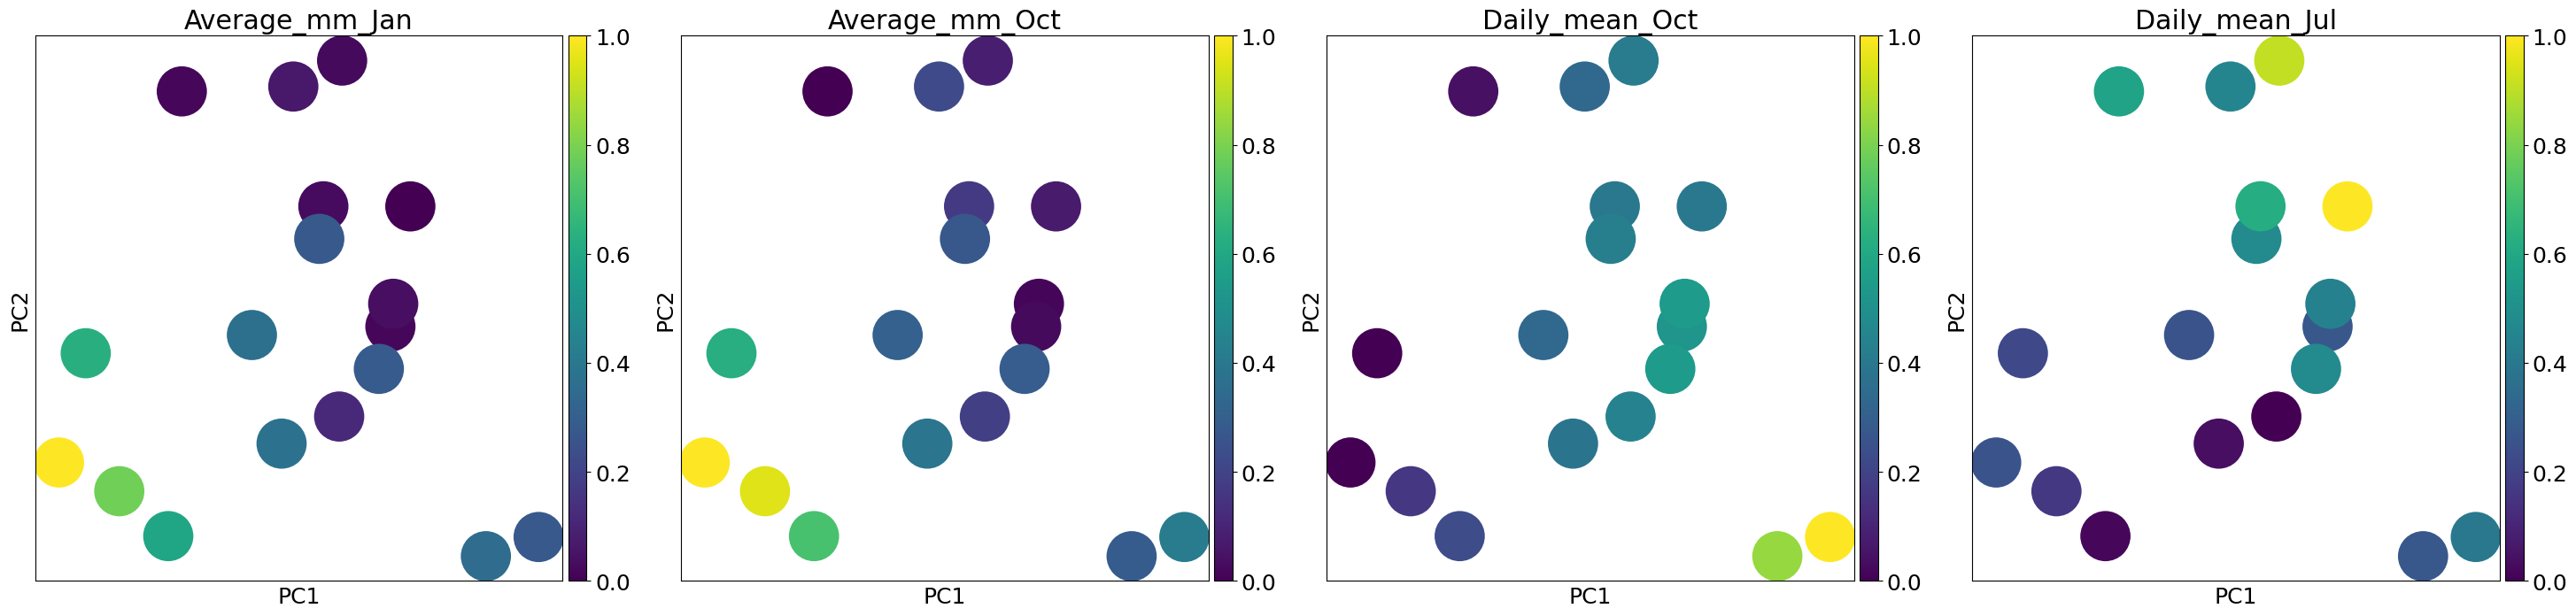

In [ ]:
# Visualize the data projected on the PCs
sc.pl.pca(my_adata, color=['Region', 'City_name'], wspace=0.4)

sc.pl.pca(my_adata, color=['Average_mm_Jan','Average_mm_Oct','Daily_mean_Oct','Daily_mean_Jul'])